In [1]:
import keras
from keras.datasets import boston_housing  #booston housing dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout #dense to add layers, and dropout
from keras.callbacks import EarlyStopping #early stopping
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

y_train[0]

np.float64(15.2)

In [3]:
x_train.shape

(404, 13)

Scalling train and test data: to make the whole data in specific range

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_train_scaled[0]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.46881898])

In [5]:
x_test_scaled = scaler_x.transform(x_test)
x_test_scaled[0]

array([0.20319551, 0.        , 0.64662757, 0.        , 0.60493827,
       0.55635167, 1.        , 0.07359588, 1.        , 0.91395793,
       0.80851064, 0.06790559, 0.75386313])

In [6]:
x_train.shape

(404, 13)

In [7]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_train_scaled[0]

np.float64(0.22666666666666668)

In [8]:
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
y_test_scaled[0]

np.float64(0.048888888888888885)

## Training the model - Regression

Task: improve the accuracy of the model
change batch_size/epocs/validation_split/optimizer/ Dense layers number

In [9]:
"""model = Sequential() # We work on regression not classification.

#input layer contains 64 neurons, activation func: reslu, input_shape: number of features enter the model
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dropout(0.25)) #dropout to above layer neurons with 25%

#Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.30))

#Output layer: one neuron as we work on regression. if we will work on classification so the neurons should equal the number of classes
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['mse']) #sgd optimizer/ adam is better"""

"model = Sequential() # We work on regression not classification.\n\n#input layer contains 64 neurons, activation func: reslu, input_shape: number of features enter the model\nmodel.add(Dense(64, activation='relu', input_shape=(13,)))\nmodel.add(Dropout(0.25)) #dropout to above layer neurons with 25%\n\n#Hidden layer\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.30))\n\n#Output layer: one neuron as we work on regression. if we will work on classification so the neurons should equal the number of classes\nmodel.add(Dense(1, activation='relu'))\n\nmodel.compile(loss='mse', optimizer='adam', metrics=['mse']) #sgd optimizer/ adam is better"

In [10]:
model = Sequential() # We work on regression not classification.

model.add(Dense(128, activation='relu', input_shape=(13,), kernel_regularizer=l2(0.001)))  # Reduced neurons, lighter L2
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))  # Linear activation for regression

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model.fit(x_train_scaled, y_train_scaled, epochs=500, batch_size=64,  # Increased batch size
                    validation_split=0.25, callbacks=[early_stopping], verbose=1)

# validation_split : spliting the training data to work on validation before the test
# EarlyStopping(monitor = 'val_loss', patience = 100)])
                #monitor is the validation loss, patience means after the first 100 epochs monitor the val loss

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 623ms/step - loss: 0.2471 - mae: 0.2485 - mse: 0.0954 - val_loss: 0.1911 - val_mae: 0.1558 - val_mse: 0.0439
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1876 - mae: 0.1610 - mse: 0.0418 - val_loss: 0.1753 - val_mae: 0.1440 - val_mse: 0.0342
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1767 - mae: 0.1498 - mse: 0.0370 - val_loss: 0.1752 - val_mae: 0.1274 - val_mse: 0.0400
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1595 - mae: 0.1118 - mse: 0.0256 - val_loss: 0.1707 - val_mae: 0.1332 - val_mse: 0.0412
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1515 - mae: 0.1068 - mse: 0.0233 - val_loss: 0.1533 - val_mae: 0.1119 - val_mse: 0.0293
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1462 - mae: 0.1108 - mse: 0.0233 - val_loss: 0.1427 - val_mae: 0.1092 - val_mse: 0.0240
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1383 - mae: 0.1094 - mse: 0.0207 - val_loss: 0.1367

In [12]:
print(history.history['mse'])

[0.07572902739048004, 0.04326632618904114, 0.03385476395487785, 0.028883418068289757, 0.023906158283352852, 0.022499386221170425, 0.019874688237905502, 0.017326004803180695, 0.01693132519721985, 0.014623023569583893, 0.015797726809978485, 0.013868633657693863, 0.014001944102346897, 0.01264286506921053, 0.01265901979058981, 0.01235278882086277, 0.013722934760153294, 0.01234282087534666, 0.011099220253527164, 0.011454645544290543, 0.011786844581365585, 0.010324720293283463, 0.010624573566019535, 0.011173673905432224, 0.010832051746547222, 0.010219709016382694, 0.009676586836576462, 0.0087217902764678, 0.008836216293275356, 0.008641411550343037, 0.008899649605154991, 0.00949163269251585, 0.007836174219846725, 0.00857609137892723, 0.008939733728766441, 0.0074406820349395275, 0.009832882322371006, 0.007987529039382935, 0.007418463472276926, 0.008086089044809341, 0.007657456211745739, 0.006609422620385885, 0.008101526647806168, 0.008318213745951653, 0.007646290119737387, 0.00711339944973588,

## Visualize the model work

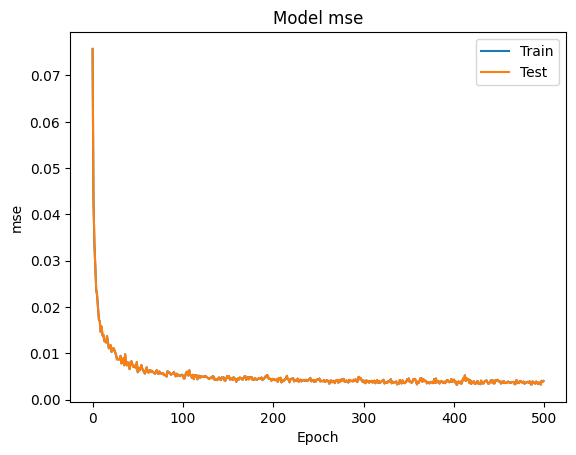

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

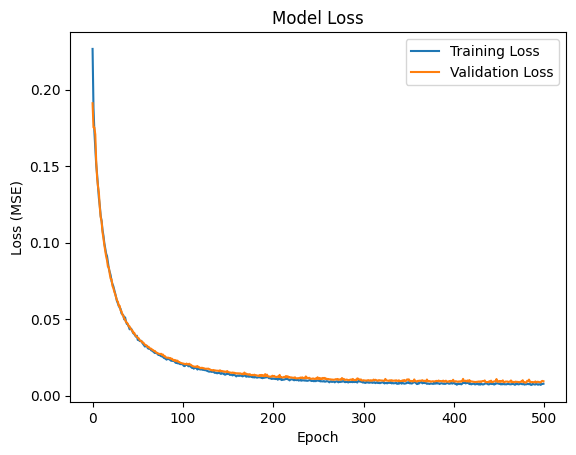

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## Evaluate the model

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate model
score = model.evaluate(x_test_scaled, y_test_scaled, verbose=1)
print('Test Loss (MSE + Regularization):', score[0])
print('Test MSE:', score[1])
print('Test MAE:', score[2])

# R² score
y_pred_scaled = model.predict(x_test_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print('Test R² Score:', r2)

# Inverse transform for original scale
scaler_y = preprocessing.StandardScaler()
scaler_y.fit(y_train.reshape(-1, 1))  # Fit scaler on training target
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Compute metrics in original scale
print('Test MSE (Original Scale):', mean_squared_error(y_test_orig, y_pred_orig))
print('Test MAE (Original Scale):', mean_absolute_error(y_test_orig, y_pred_orig))
print('Test R² Score (Original Scale):', r2_score(y_test_orig, y_pred_orig))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0107 - mae: 0.0573 - mse: 0.0070
Test Loss (MSE + Regularization): 0.012675690464675426
Test MSE: 0.008942492306232452
Test MAE: 0.061610426753759384
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Test R² Score: 0.7824638489007096
Test MSE (Original Scale): 0.7567338484077694
Test MAE (Original Scale): 0.566756500355556
Test R² Score (Original Scale): 0.7824638414695331


In [16]:
y_test_scaled

array([0.04888889, 0.30666667, 0.31111111, 0.48888889, 0.38222222,
       0.43333333, 0.58222222, 0.39777778, 0.34444444, 0.40444444,
       0.30222222, 0.21111111, 0.28444444, 1.        , 0.35111111,
       0.42888889, 0.42666667, 0.32888889, 0.31333333, 0.39333333,
       0.15555556, 0.11555556, 0.33333333, 0.3       , 0.35333333,
       0.4       , 0.5       , 0.55777778, 0.1       , 0.37777778,
       0.36      , 0.20222222, 0.62444444, 0.40888889, 0.33555556,
       0.05333333, 0.23111111, 0.41777778, 0.33555556, 0.43333333,
       0.62222222, 0.52      , 0.20222222, 0.92666667, 0.61111111,
       0.54666667, 0.52      , 0.32888889, 0.33777778, 0.44444444,
       0.67555556, 0.34      , 0.10444444, 0.21111111, 0.66444444,
       0.48      , 0.04888889, 1.        , 0.60888889, 0.36888889,
       0.55111111, 0.18      , 0.5       , 0.36      , 0.40222222,
       0.37555556, 0.17777778, 0.40444444, 0.06888889, 0.01333333,
       0.37111111, 0.54666667, 0.32444444, 0.04444444, 0.47555

## Predictions

In [17]:
prediction = model.predict(x_test_scaled)

print(prediction.flatten())
print(y_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[0.11260876 0.30271262 0.35383853 0.6472254  0.4004928  0.34670496
 0.52140343 0.3839888  0.32031634 0.3593094  0.35853025 0.28197166
 0.25718898 0.7703098  0.3358049  0.34700298 0.446756   0.3777872
 0.29933605 0.4484618  0.15917127 0.20092954 0.3388308  0.26075336
 0.33905226 0.4228695  0.5645424  0.44601443 0.13828692 0.35866073
 0.346646   0.20968693 0.6520958  0.4183228  0.28305763 0.11825368
 0.24213707 0.33308622 0.3105906  0.4483024  0.48350555 0.49188426
 0.21510729 0.77024055 0.55524886 0.3776446  0.4641345  0.3041623
 0.43047535 0.3910389  0.5831475  0.33479902 0.14675051 0.23412868
 0.6857867  0.48766997 0.18525392 0.9223025  0.6763127  0.40558174
 0.43668836 0.2794918  0.22074494 0.32953295 0.4189387  0.36269403
 0.19036323 0.3983033  0.16994914 0.1261909  0.43538162 0.5036154
 0.45678672 0.19431306 0.4560104  0.32822928 0.34758297 0.4198879
 0.64745617 0.12651971 0.3593526  0.7493528  0.28416213 0.20515794
 0.31733415 0.30156916 0.389

In [18]:
# To have copy of the model

# model.save('House_price.h5')